In [1]:
import cv2
import numpy as np
from random import randint
import os
import glob
import scipy

import matplotlib.image as mpimg
from skimage import color, io

import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io

from math import sqrt, floor


In [2]:
def get_vid_files(path, ext):
    #"*.mp4"
    #"..\Data\"
    return glob.glob(os.path.join(path, ext))


In [3]:
# Concatenate an image and its groundtruth
def concatenate_images(img, gray_img):
    nChannels = len(gray_img.shape)
    w = gray_img.shape[0]
    h = gray_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gray_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3))
        gt_img_3c[:, :, 0] = gray_img
        gt_img_3c[:, :, 1] = gray_img
        gt_img_3c[:, :, 2] = gray_img
        
        cimg = np.concatenate((img, gt_img_3c), axis=1)
    return cimg

In [6]:
def get_frames(file_path, write_path):

    name = file_path[8:-4]
    vidcap = cv2.VideoCapture(file_path)

    success, image = vidcap.read()

    count = 0
    write_count = 0
    
    write_path = write_path + name + "\\"

    if not os.path.isdir(write_path):
        os.makedirs(write_path)

    while success:
        success,image = vidcap.read()

        if success==False:
            break;

        if (randint(0, 70)) == 1: 
            
            height, width   = image.shape[:2];

            aspectRatio = width / height
            area = 130000

            heightResiszed = floor(sqrt(area / aspectRatio))
            widthResised = floor(heightResiszed * aspectRatio)
            
            image = cv2.resize(image, (widthResised, heightResiszed))
  
        
            '''
            cropped = image[heightPerTwo-128:heightPerTwo+128, widthPerTwo-128:widthPerTwo+128] 
            '''
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB);
            cv2.imencode(".jpg", image)
    
            #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #(thresh, im_bw) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
           
            #print(gray.shape)
            #np.concatenate((small, gray), axis=0)
            #image = concatenate_images(image, gray)
            
            #+ "C_"
            #cv2.imwrite(write_path + name + "%d.jpg" % write_count, cropped) 
            #cv2.imwrite(write_path + "G_" + name + "%d.jpg" % write_count, gray)
                                
            #image_yuv = color.rgb2yuv(cropped)
            plt.imsave(write_path + name + "%d.jpg" % write_count, image, "CV_IMWRITE_JPEG_QUALITY", 95 )
            
            write_count += 1
            
            #cv2.imwrite("bw_frame%d.jpg" % count, im_bw)
            

        count += 1

In [7]:
a = '..'
b = 'Data'
c = 'Ghibli'

path = os.path.join(a, b)

d = 'Extracted'

writePath = os.path.join(a, b, d + os.sep)

files1 = get_vid_files(path, '*.mp4')
files2 = get_vid_files(path, '*.mkv')
files3 = get_vid_files(path, '*.avi')
    
print(path)
print(writePath)

for f in files1:
    get_frames(f, writePath)
    
for f in files2:
    get_frames(f, writePath)

for f in files3:
    get_frames(f, writePath)



..\Data
..\Data\Extracted\


In [327]:
from Helpers import get_files,get_next_batch_from_disk_RGB_Nocrop
import matplotlib.pyplot as plt
%matplotlib inline

images_list = get_files("../Data/Old/*", '*.jpg')

gray, img = get_next_batch_from_disk_RGB_Nocrop(images_list, 2)

index = 1
r = img[index][..., 0]
g = img[index][..., 1]
b = img[index][..., 2]

img = np.dstack((r,g,b))

grayImg = gray[index][..., 0]

In [328]:
imgCv = (img * 255).astype("uint8")

gray = cv2.cvtColor(imgCv, cv2.COLOR_RGB2GRAY)

gray_denoised = cv2.GaussianBlur(gray,(3,3), 0)

laplacian = cv2.Laplacian(gray_denoised,cv2.CV_64F)
sobelx = cv2.Sobel(gray_denoised, cv2.CV_64F, 1, 0, ksize=13)  # x
sobely = cv2.Sobel(gray_denoised, cv2.CV_64F, 0, 1, ksize=13)  # y



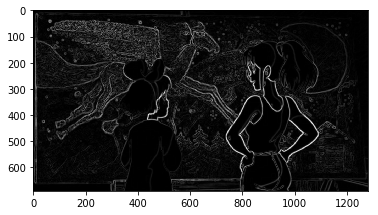

In [329]:
plt.imshow(abs(sobely) + abs(sobelx) + abs(laplacian), cmap="gray")

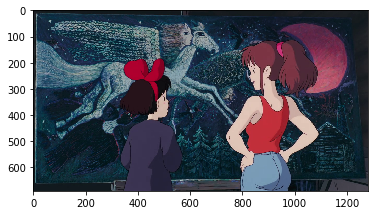

In [330]:
plt.imshow(img)

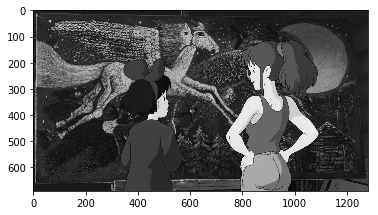

In [331]:
plt.imshow(gray, cmap="gray")

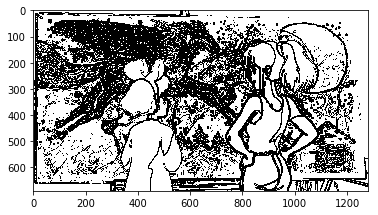

In [332]:

final = abs(sobely) + abs(sobelx) + abs(laplacian)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(final)

final = cv2.normalize(final, final, 0, 1, cv2.NORM_MINMAX);

#Use a value different from 'min', which will (almost always) be 0.

a = np.array([1])

final255 = (final*255).astype("uint8")

retval, thresholded = cv2.threshold(final255, 10, 255, cv2.THRESH_BINARY_INV)
retval2,threshold2 = cv2.threshold(final255, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
threshold3 = cv2.adaptiveThreshold(final255, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 115, 1)


plt.imshow(thresholded, cmap="gray")


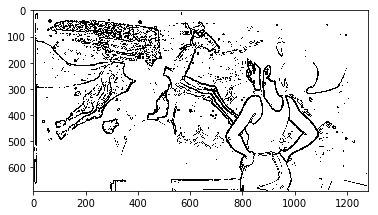

In [333]:
plt.imshow(threshold2, cmap="gray")

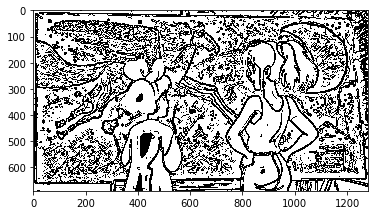

In [334]:
plt.imshow(threshold3, cmap="gray")

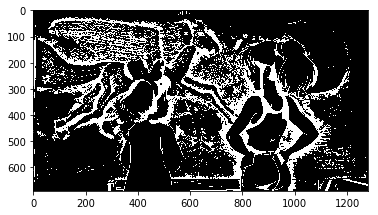

In [335]:
threshold4 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 115, 15)

plt.imshow(threshold4, cmap="gray")


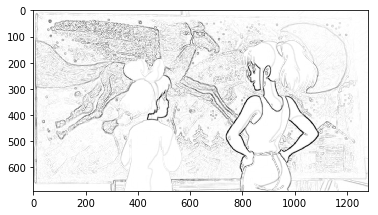

In [336]:
plt.imshow(255 - final255, cmap="gray")

In [303]:
final_inv = final255

In [307]:
import numpy as np
np.set_printoptions(threshold=np.inf)



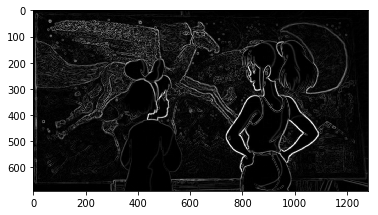

In [337]:
imgCv = (img * 255).astype("uint8")

gray = cv2.cvtColor(imgCv, cv2.COLOR_RGB2GRAY)
b = imgCv[..., 0]
g = imgCv[..., 1]
r = imgCv[..., 2]

b_denoised = cv2.GaussianBlur(b, (3,3), 0)
g_denoised = cv2.GaussianBlur(g, (3,3), 0)
r_denoised = cv2.GaussianBlur(r, (3,3), 0)

laplacianB = cv2.Laplacian(r_denoised,cv2.CV_64F)
sobelBx = cv2.Sobel(b_denoised, cv2.CV_64F, 1, 0, ksize=13)  # x
sobelBy = cv2.Sobel(b_denoised, cv2.CV_64F, 0, 1, ksize=13)  # y

laplacianG = cv2.Laplacian(g_denoised,cv2.CV_64F)
sobelGx = cv2.Sobel(g_denoised, cv2.CV_64F, 1, 0, ksize=13)  # x
sobelGy = cv2.Sobel(g_denoised, cv2.CV_64F, 0, 1, ksize=13)  # y

laplacianR = cv2.Laplacian(r_denoised,cv2.CV_64F)
sobelRx = cv2.Sobel(r_denoised, cv2.CV_64F, 1, 0, ksize=13)  # x
sobelRy = cv2.Sobel(r_denoised, cv2.CV_64F, 0, 1, ksize=13)  # y


plt.imshow(abs(sobelBx) + abs(sobelBy) + abs(laplacianB), cmap="gray" )

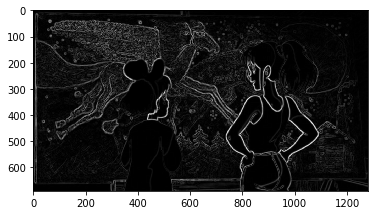

In [338]:

plt.imshow(abs(sobelGx) + abs(sobelGy) + abs(laplacianG), cmap="gray" )

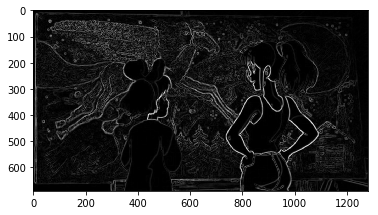

In [339]:

plt.imshow(abs(sobelRx) + abs(sobelRy) + abs(laplacianR), cmap="gray" )